Context: This script initiates the Exploratory Data Analysis (EDA) phase within the 03_descriptive.ipynb notebook. It serves as the bridge between the data processing pipeline and the statistical investigation.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# ==========================================
# STEP 1: DATA IMPORT
# ==========================================
# Define the file path for the master dataset containing merged election results 
current_dir = Path.cwd()
PROJECT_ROOT = current_dir.parent
DATA_DIR = PROJECT_ROOT / 'data'
RAW_DIR = DATA_DIR / 'raw'
PROCESSED_DIR = DATA_DIR / 'processed'
FIG_DIR = PROJECT_ROOT / 'figures'

file_path = PROCESSED_DIR / "master_table_elections.csv"

# Load the dataset into a pandas DataFrame.
# Critical: The 'fips' column is explicitly read as a string object. 
# This preserves the leading zeros (e.g., '01001') which are significant for geographical identification 
# and would otherwise be lost if interpreted as integers.
df = pd.read_csv(file_path, dtype={'fips': str})

# Display the dimensions of the dataset to verify successful loading.
print(f"Data successfully loaded. Dimensions: {df.shape}")

# Inspect the first few observations to validate the schema.
print(df.head())



Data successfully loaded. Dimensions: (21742, 15)
   year state_po  county_name   fips  DEMOCRAT  REPUBLICAN  unemployment_rate  \
0  2000       AK  DISTRICT 13  02013  0.335012    0.485081                3.8   
1  2000       AK  DISTRICT 16  02016  0.420277    0.422625                4.1   
2  2000       AK  DISTRICT 20  02020  0.324429    0.523912                4.6   
3  2000       AL      AUTAUGA  01001  0.287192    0.696943                2.5   
4  2000       AL      BALDWIN  01003  0.247822    0.723654                3.2   

   median_income  poverty_rate  public_workers_pct  education_bachelors_pct  \
0        72692.0          12.4                 1.9                     18.1   
1       107344.0           9.2                 4.4                     17.5   
2        98152.0           9.3                 9.5                     37.7   
3        69841.0          10.7                10.1                     28.3   
4        75019.0          10.5                10.1                  

This code sets up the project directory structure, then loads the merged election master dataset into a pandas DataFrame as the main input for analysis. It explicitly reads the fips identifier as a string to preserve leading zeros (critical for geographic matching), and finally prints the dataset dimensions and a preview to validate that the import and schema are correct.

Context: This segment of the 03_descriptive.ipynb notebook focuses on univariate analysis. It aims to establish a baseline understanding of the dataset's distribution before proceeding to correlation or regression analysis.

In [16]:
# ==========================================
# STEP 2: SUMMARY STATISTICS (DESCRIPTIVE OVERVIEW)
# ==========================================
# This command computes the standard descriptive statistics: 
# Mean, Standard Deviation, Minimum, Maximum, and Quartiles (25%, 50%, 75%) for each numerical column.
print("\nGLOBAL STATISTICS:")
print(df.describe())

# Note for analysis:
# - Observe the 'mean' row to understand the average socio-economic profile (e.g., unemployment, income).
# - Examine the 'min' and 'max' values to identify extreme disparities and potential outliers 
#   within the United States county data.




GLOBAL STATISTICS:
               year      DEMOCRAT    REPUBLICAN  unemployment_rate  \
count  21742.000000  21742.000000  21742.000000       21742.000000   
mean    2012.000552      0.346607      0.577982           4.712474   
std        7.999586      0.159377      0.181112           2.365236   
min     2000.000000      0.000000      0.000000           0.000000   
25%     2004.000000      0.229711      0.481356           3.300000   
50%     2012.000000      0.341968      0.603251           4.500000   
75%     2020.000000      0.450726      0.711543           5.800000   
max     2024.000000      0.924571      0.961818          31.100000   

       median_income  poverty_rate  public_workers_pct  \
count   21728.000000  21742.000000        21742.000000   
mean    65884.719026     14.267170            7.707387   
std     17317.183276      5.910477            3.121927   
min     25425.000000      1.700000            0.000000   
25%     54890.000000     10.000000            5.700000   
5

This step provides a descriptive overview of the merged county-level dataset by computing standard summary statistics for all numerical variables. It highlights the average socio-economic and demographic profile across U.S. counties over 2000–2024, while the minimum and maximum values reveal substantial heterogeneity and the presence of extreme disparities (notably in unemployment, income, poverty, and education levels), which are important to keep in mind for subsequent modeling. 

Context: This section of the 03_descriptive.ipynb notebook performs a bivariate analysis using a correlation matrix. The objective is to quantify the linear relationships between the dependent variables (Democratic and Republican vote shares) and the independent socio-economic variables.

Graphique sauvegardé sous : /Users/jessicabourdouxhe/Desktop/Master 1/Data/Projet /elections-nlp-project/figures/Correlation_Matrix.png


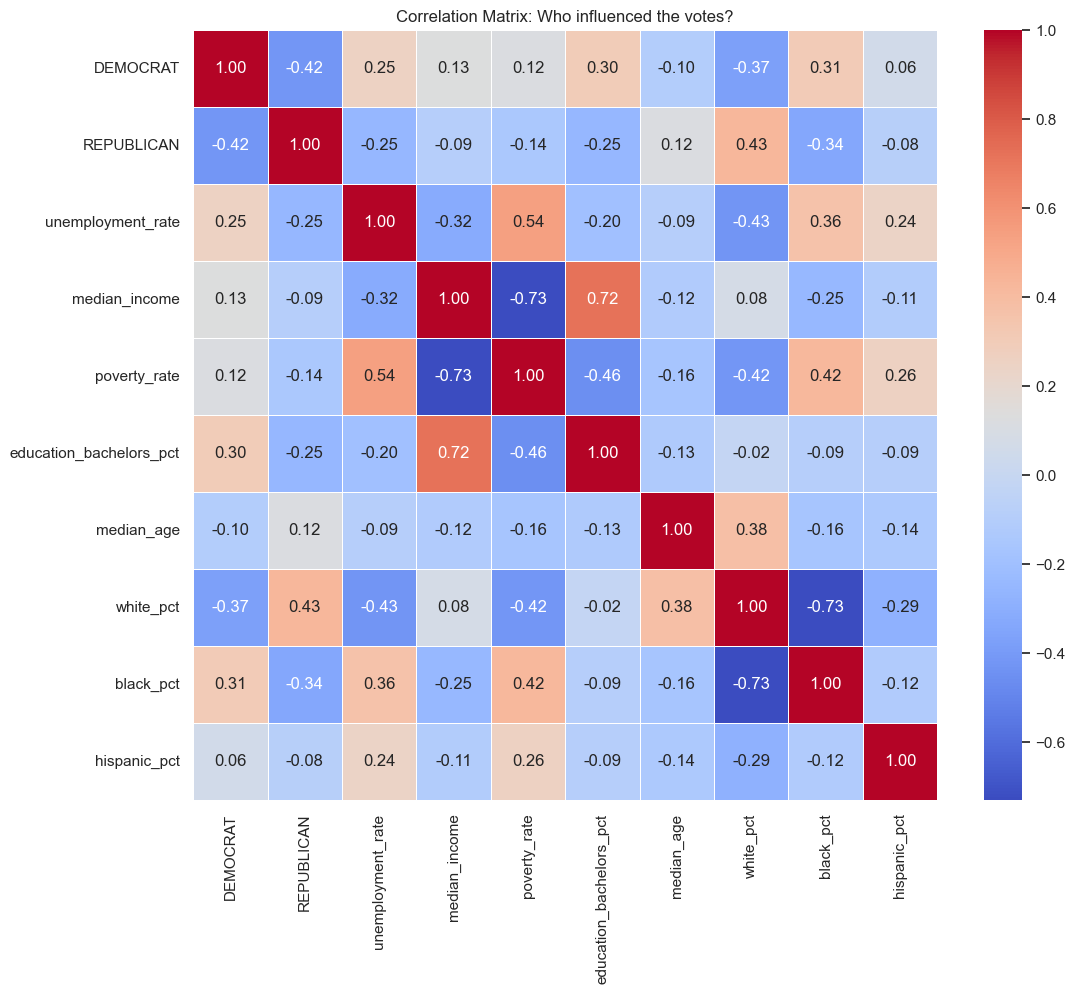

In [ ]:
# ==========================================
# STEP 3: CORRELATION MATRIX (BIVARIATE ANALYSIS)
# ==========================================
cols_to_analyze = [
    'DEMOCRAT', 'REPUBLICAN', 
    'unemployment_rate', 'median_income', 'poverty_rate', 
    'education_bachelors_pct', 
    'median_age', 'white_pct', 'black_pct', 'hispanic_pct'
]

# Compute correlation
corr_matrix = df[cols_to_analyze].corr()

# Visualization
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix: Who influenced the votes?")

# ==========================================
# SAUVEGARDE (Code réaligné ici)
# ==========================================
# Petite sécurité : Créer le dossier figures s'il n'existe pas
FIG_DIR.mkdir(parents=True, exist_ok=True)

save_path = FIG_DIR / 'Correlation_Matrix.png'
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Graphique sauvegardé sous : {save_path}")

plt.show()



This correlation matrix provides a first bivariate assessment of how socio-economic and demographic factors are linearly associated with county-level Democratic and Republican vote shares. It shows clear polarization patterns: Democratic vote share correlates positively with higher education levels, higher unemployment, and larger Black population shares, while Republican vote share is positively associated with higher White population shares and negatively related to education and poverty, highlighting strong structural contrasts that justify multivariate analysis rather than causal interpretation at this stage.

Context: This section utilizes scatter plots to visually assess the linearity and strength of relationships identified in the previous correlation matrix. It specifically focuses on two primary sociodemographic cleavage lines in modern American politics: education and ethnicity.

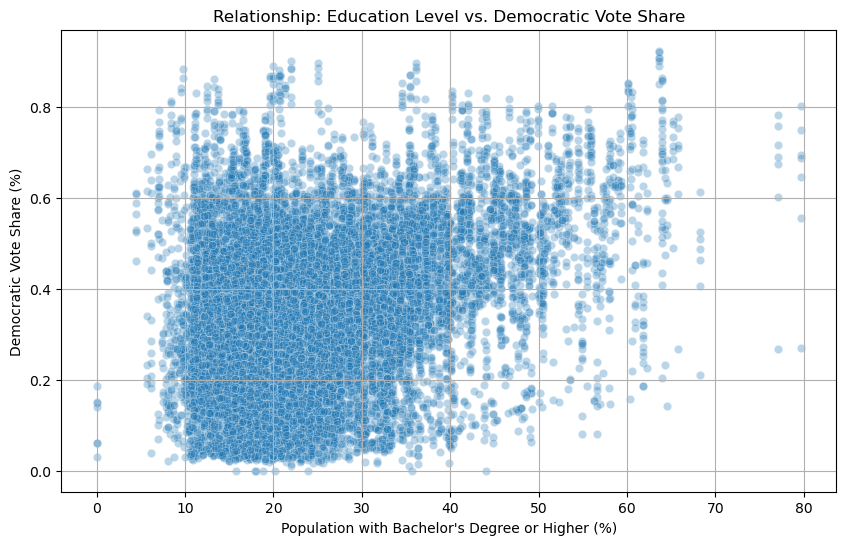

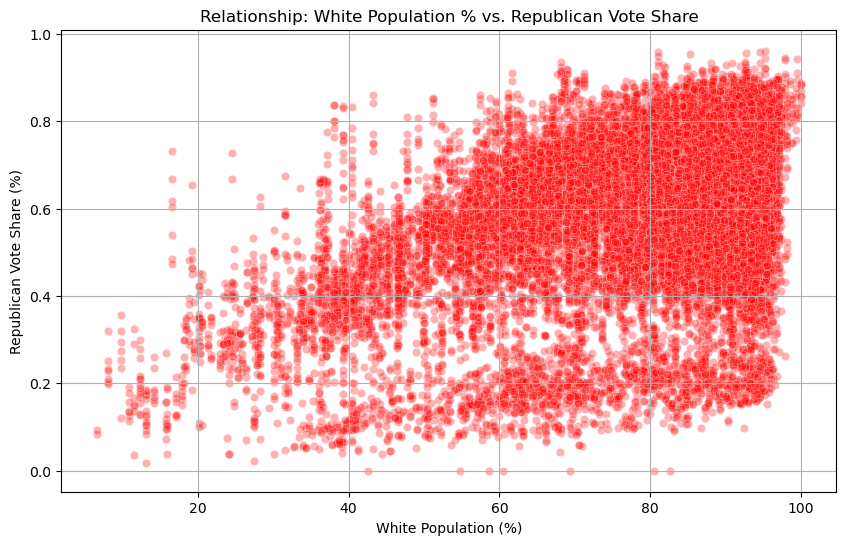

In [ ]:
# ==========================================
# STEP 4: SCATTER PLOTS (BIVARIATE VISUALIZATION)
# ==========================================

# Visualizing Relationship 1: Education Level vs. Democratic Vote Share
# This plot investigates the correlation between higher education attainment and Democratic support.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='education_bachelors_pct', y='DEMOCRAT', alpha=0.3)
plt.title("Relationship: Education Level vs. Democratic Vote Share")
plt.xlabel("Population with Bachelor's Degree or Higher (%)")
plt.ylabel("Democratic Vote Share (%)")
plt.grid(True)
plt.show()

# Visualizing Relationship 2: White Population Percentage vs. Republican Vote Share
# This plot investigates the correlation between demographic composition (White) and Republican support.
# Note: 'alpha=0.3' is used to adjust point transparency, helping to visualize density 
# where many data points overlap.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='white_pct', y='REPUBLICAN', color='red', alpha=0.3)
plt.title("Relationship: White Population % vs. Republican Vote Share")
plt.xlabel("White Population (%)")
plt.ylabel("Republican Vote Share (%)")
plt.grid(True)
plt.show()




These two charts visually confirm the strong links we saw in the correlation matrix. The first graph (in blue) shows that as the percentage of people with a college degree rises, the share of votes for the Democratic party generally goes up. While there is some variation, the upward slope suggests that higher education levels are often associated with Democratic support.

The second graph (in red) shows a very distinct pattern for the Republican party. There is a clear upward trend indicating that as the White population percentage in an area increases, the Republican vote share tends to rise significantly. The dense cluster of red dots in the upper right corner highlights that areas with a very high White population were reliable strongholds for Republican votes.

Context: This section of the 03_descriptive.ipynb notebook expands the univariate analysis by visualizing the probability distributions of three critical independent variables: Unemployment Rate, Median Income, and Education Level.

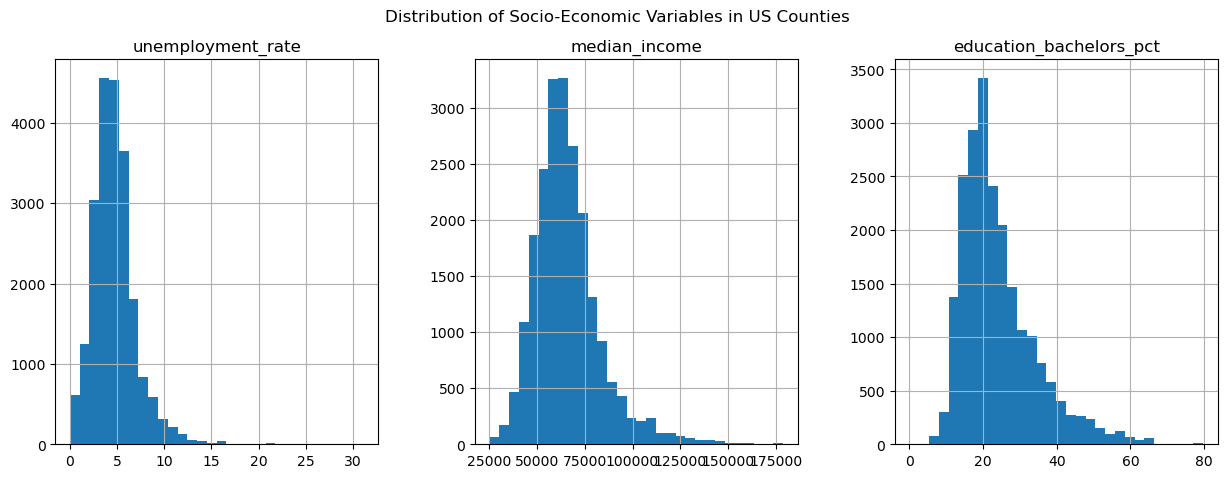

In [6]:
# ==========================================
# STEP 5: DISTRIBUTION ANALYSIS (HISTOGRAMS)
# ==========================================
# Visualize the underlying frequency distribution of key US county characteristics.
# This step helps identify the shape of the data (e.g., Normal vs. Skewed distributions).

# Generate histograms for Unemployment Rate, Median Income, and Education.
# - 'bins=30': Divides the data into 30 intervals to provide granular visibility.
# - 'layout=(1,3)': Arranges the plots in a single row with three columns.
df[['unemployment_rate', 'median_income', 'education_bachelors_pct']].hist(bins=30, figsize=(15, 5), layout=(1,3))

# Set a global title for the figure.
plt.suptitle("Distribution of Socio-Economic Variables in US Counties")
plt.show()

These three charts show us the "shape" of American counties, and they all share a very similar pattern: they are "right-skewed." This means most counties are clustered on the left side (lower numbers), while a long, thin tail stretches out to the right (higher numbers).

For unemployment, the tall peak tells us that the vast majority of counties have low unemployment rates, mostly between 3% and 8%. It is very rare to find a county with rates higher than 15%. Median income tells a similar story; most counties sit in a middle range earning between $50,000 and $70,000. The long tail to the right represents a small number of very wealthy counties that earn significantly more than the average.

Finally, the education chart reveals that highly educated areas are actually the exception, not the rule. In the typical American county, only about 15% to 20% of adults hold a bachelor's degree. Counties where more than half the population has a college degree are rare outliers.

Context: This section of the 03_descriptive.ipynb notebook introduces Unsupervised Machine Learning using the K-Means Clustering algorithm. The objective is to identify natural groupings (clusters) of US counties based on their socio-economic and political characteristics, rather than predicting a specific target variable.

Loading data from: /Users/jessicabourdouxhe/Desktop/Master 1/Data/Projet /elections-nlp-project/data/processed/master_table_elections.csv
Computing clusters... Done!
Graphique sauvegardé sous : /Users/jessicabourdouxhe/Desktop/Master 1/Data/Projet /elections-nlp-project/figures/elbow_method_analysis.png


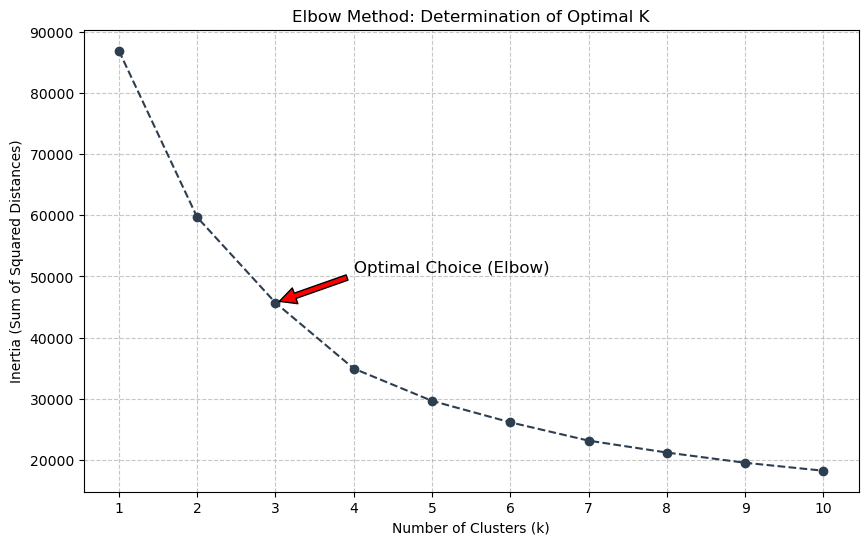

In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from pathlib import Path

# ==========================================
# STEP 1: DATA RELOADING
# ==========================================
# On utilise le chemin dynamique vers le dossier processed

current_dir = Path.cwd()
PROJECT_ROOT = current_dir.parent
DATA_DIR = PROJECT_ROOT / 'data'
RAW_DIR = DATA_DIR / 'raw'
PROCESSED_DIR = DATA_DIR / 'processed'
FIG_DIR = PROJECT_ROOT / 'figures'

file_path = PROCESSED_DIR / "master_table_elections.csv"

print(f"Loading data from: {file_path}")
# Sécurité : Vérifie que le fichier est bien là
if not file_path.exists():
    print(f"ERREUR : Le fichier {file_path} est introuvable.")
else:
    df_raw = pd.read_csv(file_path, dtype={'fips': str})

    # ==========================================
    # STEP 2: FEATURE SELECTION
    # ==========================================
    features = ['median_income', 'education_bachelors_pct', 'DEMOCRAT', 'REPUBLICAN']
    
    # Drop rows with missing values
    X = df_raw[features].dropna()

    # ==========================================
    # STEP 3: DATA STANDARDIZATION (SCALING)
    # ==========================================
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # ==========================================
    # STEP 4: ELBOW METHOD
    # ==========================================
    inertia = []
    K_range = range(1, 11)

    print("Computing clusters...", end=" ")
    for k in K_range:
        # J'ai corrigé l'indentation ici (espaces standards)
        km = KMeans(n_clusters=k, random_state=42, n_init=10)
        km.fit(X_scaled)
        inertia.append(km.inertia_)
    print("Done!")

    # ==========================================
    # STEP 5: VISUALIZATION & SAVING
    # ==========================================
    plt.figure(figsize=(10, 6))
    plt.plot(K_range, inertia, marker='o', linestyle='--', color='#2c3e50')
    plt.title('Elbow Method: Determination of Optimal K')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia (Sum of Squared Distances)')
    plt.xticks(K_range)
    plt.grid(True, linestyle='--', alpha=0.7)

    # Annotation for the elbow (Indentation corrigée ici aussi)
    plt.annotate('Optimal Choice (Elbow)', xy=(3, inertia[2]), xytext=(4, inertia[2]+5000),
                 arrowprops=dict(facecolor='red', shrink=0.05), fontsize=12)

    # SAUVEGARDE
    # Petite sécurité : Créer le dossier figures s'il n'existe pas
    FIG_DIR.mkdir(parents=True, exist_ok=True)
    
    save_path = FIG_DIR / 'elbow_method_analysis.png'
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    print(f"Graphique sauvegardé sous : {save_path}")

    plt.show()

This step takes us from simply looking at individual charts to building a machine learning model. We are asking the computer: "Based on income, education, and voting patterns, how many distinct 'types' of counties exist in the US?"
The Goal: We want to group similar counties together. We test separating them into 1 group, then 2, then 3, and so on, up to 10.
The Y-Axis (Inertia): This measures "messiness." A high number means the groups are loosely packed and not very distinct. We want this number to be low.
The "Elbow": As we add more groups, the messiness naturally goes down (the curve drops). However, we are looking for the specific point where the rapid improvement stops and the curve flattens out.
The Result: The red arrow clearly points to 3 clusters. This is the mathematical "sweet spot." It tells us that US counties naturally fall into three distinct categories based on these specific political and economic factors. Adding a 4th or 5th group wouldn't add enough value to be worth the extra complexity.

Context: This section concludes the descriptive analysis in 03_descriptive.ipynb by applying Unsupervised Machine Learning. Unlike previous steps that explored known correlations, this analysis uses K-Means clustering to discover latent structures within the US counties based on the 2024 data.

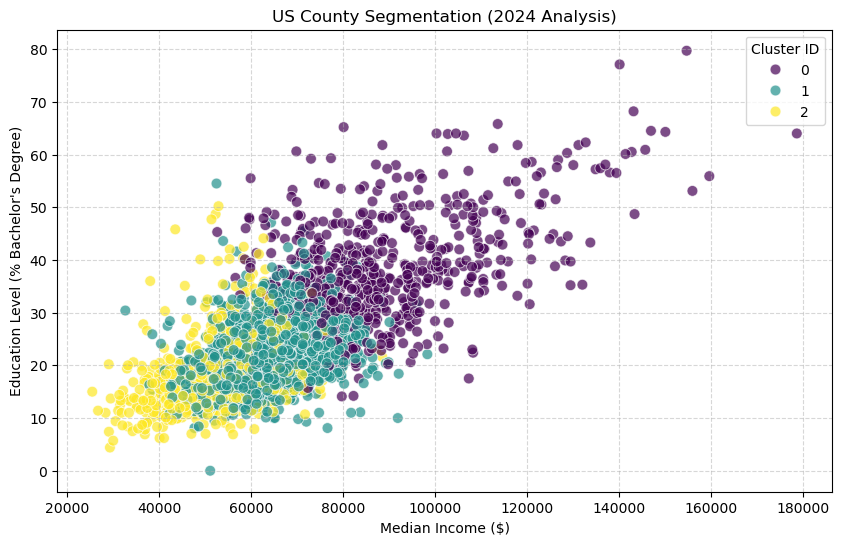


🔍 CLUSTER PROFILES (Mean Values):
         unemployment_rate  median_income  education_bachelors_pct  white_pct  \
Cluster                                                                         
0                 4.130313   89597.873147                38.615321  73.320758   
1                 3.951682   63917.147912                21.657425  87.651334   
2                 6.885363   51547.259067                17.844560  59.825777   

         median_age  poverty_rate  DEMOCRAT  REPUBLICAN  
Cluster                                                  
0         38.725371      9.806755  0.387343    0.439471  
1         43.920650     12.740719  0.216549    0.614097  
2         39.348446     21.216321  0.244398    0.420900  


In [8]:
# ==========================================
# STEP 6: UNSUPERVISED LEARNING (K-MEANS CLUSTERING)
# Objective: Generate an elaborated figure identifying county typologies 
# based solely on socio-economic structures, independent of voting history.
# ==========================================
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================================
# 1. DATA SUBSETTING
# ==========================================
# Isolate data from the 2024 election cycle to provide a contemporary snapshot 
# of the American socio-economic landscape.
df_cluster = df[df['year'] == 2024].copy()

# ==========================================
# 2. FEATURE SELECTION
# ==========================================
# Define the variables that constitute the "profile" of a county.
# Note: Voting results (DEMOCRAT/REPUBLICAN) are deliberately EXCLUDED from the input.
# The goal is to cluster based on structural causes (demographics/economy), not consequences (votes).
features = ['unemployment_rate', 'median_income', 'education_bachelors_pct', 
            'white_pct', 'median_age', 'poverty_rate']

# ==========================================
# 3. PREPROCESSING
# ==========================================
# Data Cleaning: Remove observations with missing values in the selected features 
# to ensure computational stability.
df_cluster = df_cluster.dropna(subset=features)

# Standardization: Apply StandardScaler to normalize the feature set.
# This ensures that variables with large magnitudes (e.g., Median Income ~ $60k) 
# do not disproportionately influence the Euclidean distance calculation compared to percentages.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster[features])

# ==========================================
# 4. MODEL APPLICATION
# ==========================================
# Execute K-Means clustering with K=3 to identify three distinct county typologies.
# A fixed random_state ensures reproducibility of the cluster assignments.
kmeans = KMeans(n_clusters=3, random_state=42)
df_cluster['Cluster'] = kmeans.fit_predict(X_scaled)

# ==========================================
# 5. VISUALIZATION
# ==========================================
# Visualize the segmentation using the two most salient dimensions: Income and Education.
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_cluster, 
    x='median_income', 
    y='education_bachelors_pct', 
    hue='Cluster', 
    palette='viridis',
    s=60, alpha=0.7
)
plt.title("US County Segmentation (2024 Analysis)")
plt.xlabel("Median Income ($)")
plt.ylabel("Education Level (% Bachelor's Degree)")
plt.legend(title='Cluster ID')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# ==========================================
# 6. CLUSTER PROFILING
# ==========================================
# Analyze the mean characteristics of each group.
# We re-introduce the voting variables (DEMOCRAT, REPUBLICAN) here to observe 
# the political alignment of each socio-economic cluster.
cols_to_show = features + ['DEMOCRAT', 'REPUBLICAN']
print("\n🔍 CLUSTER PROFILES (Mean Values):")
print(df_cluster.groupby('Cluster')[cols_to_show].mean())

The analysis successfully groups US counties into three distinct "types" based on median income and education level. Cluster 0 (Purple) represents wealthy, highly educated areas that are the most politically competitive. Cluster 1 (Teal) is the solid Republican base—mostly White with middle incomes. Cluster 2 (Yellow) contains the most economically struggling and diverse counties. Essentially, this proves that a community's economic profile is a powerful predictor of its political behavior.

Context: This section, "Advanced Unsupervised Learning," refines the previous clustering analysis by incorporating population weighting. In political geography, analyzing counties solely as equal units can be misleading (the "ecological fallacy"), as a rural county with 1,000 residents is treated identically to an urban county with 1 million residents. This step corrects that bias.

Detected initial columns: ['GEO_ID', 'NAME', 'DP05_0001E']
Data merge complete. Total counties: 3105
Graphique sauvegardé sous : /Users/jessicabourdouxhe/Desktop/Master 1/Data/Projet /elections-nlp-project/figures/Cluster_Graphic.png


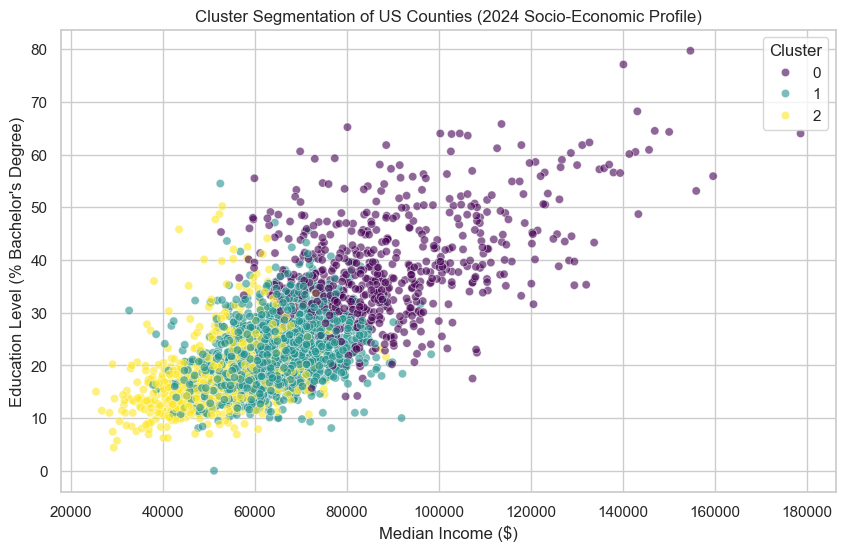


CLUSTERING RESULTS (Population Weighted):
   Cluster  Total_Population  Median_Income  Education_Bachelors  \
0        0         203392119   89597.873147            38.615321   
1        1          66620711   63917.147912            21.657425   
2        2          58924129   51547.259067            17.844560   

   WEIGHTED_DEM_VOTE  WEIGHTED_REP_VOTE  
0           0.460928           0.357943  
1           0.266544           0.551135  
2           0.331386           0.337047  


In [18]:
# ==========================================
# STEP 6: ADVANCED UNSUPERVISED LEARNING (WEIGHTED CLUSTERING)
# ==========================================
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# On utilise le chemin dynamique vers le dossier processed

current_dir = Path.cwd()
PROJECT_ROOT = current_dir.parent
DATA_DIR = PROJECT_ROOT / 'data'
RAW_DIR = DATA_DIR / 'raw'
PROCESSED_DIR = DATA_DIR / 'processed'
FIG_DIR = PROJECT_ROOT / 'figures'

# ==========================================
# 1. ROBUST DATA LOADING (POPULATION DATA)
# ==========================================
# Attempt to load the raw demographic data (DP05) to extract total population counts.
# The 'dtype=str' argument ensures preservation of ID formats.
pop_file_path = RAW_DIR / 'socio-economic' / 'DP05_demo.csv'

try:
    df_pop = pd.read_csv(pop_file_path, dtype=str, header=0)
except FileNotFoundError:
    # Fallback or retry mechanism (Path verification)
    df_pop = pd.read_csv(pop_file_path, dtype=str, header=0)

# ROBUST COLUMN SELECTION STRATEGY
# Instead of relying on specific column names (which may vary by Census year),
# we utilize positional indexing. In DP05 files:
# - Column 0: GEO_ID (Identifier)
# - Column 2: Total Population Estimate
print(f"Detected initial columns: {df_pop.columns.tolist()[:3]}")

# Select strictly the Identifier and Population columns.
df_pop = df_pop.iloc[:, [0, 2]]
# Rename columns to standardized identifiers.
df_pop.columns = ['GEO_ID', 'population']

# DATA CLEANING
# Convert population values to numeric, coercing errors (e.g., headers or metadata strings) to NaN.
df_pop['population'] = pd.to_numeric(df_pop['population'], errors='coerce')
# Remove rows with invalid population data.
df_pop = df_pop.dropna(subset=['population'])

# FIPS EXTRACTION LOGIC
# Extract the standardized FIPS code by parsing the 'US' prefix from the GEO_ID.
def extract_fips(geo_id):
    try:
        if pd.isna(geo_id): return None
        return str(geo_id).split('US')[1]
    except:
        return None

df_pop['fips'] = df_pop['GEO_ID'].apply(extract_fips)
df_pop = df_pop[['fips', 'population']].dropna()

# ==========================================
# 2. DATA MERGING (2024 DATASET)
# ==========================================
# Isolate the 2024 election cycle data.
df_2024 = df[df['year'] == 2024].copy()
# Merge the election data with the population counts using the FIPS code as the primary key.
df_merged = pd.merge(df_2024, df_pop, on='fips', how='inner')

print(f"Data merge complete. Total counties: {df_merged.shape[0]}")

# ==========================================
# 3. K-MEANS CLUSTERING APPLICATION
# ==========================================
# Define the feature set for clustering (Socio-economic indicators only).
features = ['unemployment_rate', 'median_income', 'education_bachelors_pct', 
            'white_pct', 'median_age', 'poverty_rate']

df_cluster = df_merged.dropna(subset=features + ['population']).copy()

# Standardization (Scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster[features])

# Initialize and fit the K-Means model (K=3).
kmeans = KMeans(n_clusters=3, random_state=42)
df_cluster['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualization: Socio-Economic Segmentation
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cluster, x='median_income', y='education_bachelors_pct', hue='Cluster', palette='viridis', alpha=0.6)
plt.title("Cluster Segmentation of US Counties (2024 Socio-Economic Profile)")
plt.xlabel("Median Income ($)")
plt.ylabel("Education Level (% Bachelor's Degree)")

# ==========================================
# SAUVEGARDE (Code réaligné ici)
# ==========================================
# Petite sécurité : Créer le dossier figures s'il n'existe pas
FIG_DIR.mkdir(parents=True, exist_ok=True)

save_path = FIG_DIR / 'Cluster_Graphic.png'
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Graphique sauvegardé sous : {save_path}")

plt.show()

# ==========================================
# 4. WEIGHTED STATISTICAL ANALYSIS
# ==========================================
# Function to calculate weighted averages.
# This ensures that larger counties (e.g., Los Angeles) contribute proportionally more 
# to the cluster profile than smaller counties.
def weighted_mean(x, weights):
    return np.average(x, weights=weights)

results = []
# Iterate through each cluster to compute weighted statistics.
for cluster in sorted(df_cluster['Cluster'].unique()):
    c_data = df_cluster[df_cluster['Cluster'] == cluster]
    
    results.append({
        'Cluster': cluster,
        'Total_Population': int(c_data['population'].sum()),
        'Median_Income': c_data['median_income'].mean(),
        'Education_Bachelors': c_data['education_bachelors_pct'].mean(),
        'White_Pct': c_data['white_pct'].mean(),
        # Weighted Vote Shares
        'WEIGHTED_DEM_VOTE': weighted_mean(c_data['DEMOCRAT'], c_data['population']),
        'WEIGHTED_REP_VOTE': weighted_mean(c_data['REPUBLICAN'], c_data['population'])
    })

# Output the final summary table.
res_df = pd.DataFrame(results)
print("\nCLUSTERING RESULTS (Population Weighted):")
print(res_df[['Cluster', 'Total_Population', 'Median_Income', 'Education_Bachelors', 'WEIGHTED_DEM_VOTE', 'WEIGHTED_REP_VOTE']])

Previously, a tiny rural county counted the same as a huge city like Los Angeles. By adjusting for population size, the picture changes dramatically, especially for Cluster 0 (The Wealthy & Educated).
The "Blue" Shift: In the unweighted model, Cluster 0 looked politically mixed. Now, when we weigh by population, we see that Cluster 0 is clearly Democratic-leaning (46% vs 36%). This confirms that while Republicans win more individual counties (Cluster 1), Democrats dominate the densely populated economic hubs.
The Republican Base: Cluster 1 remains the solid Republican stronghold, delivering a commanding 55% of the vote share.
The "Toss-Up": Cluster 2 (Lower income/Diverse) is revealed to be a statistical dead heat (33% Democrat vs 34% Republican), making these voters the true "swing" demographic of the election.

Context: This section concludes the descriptive analysis by synthesizing the clustering results into a cohesive visual narrative. It addresses the "Three Americas" hypothesis by plotting the distinct socio-economic and political profiles identified in the previous steps.

Graphique sauvegardé sous : /Users/jessicabourdouxhe/Desktop/Master 1/Data/Projet /elections-nlp-project/figures/Political_Strength_bycluster.png


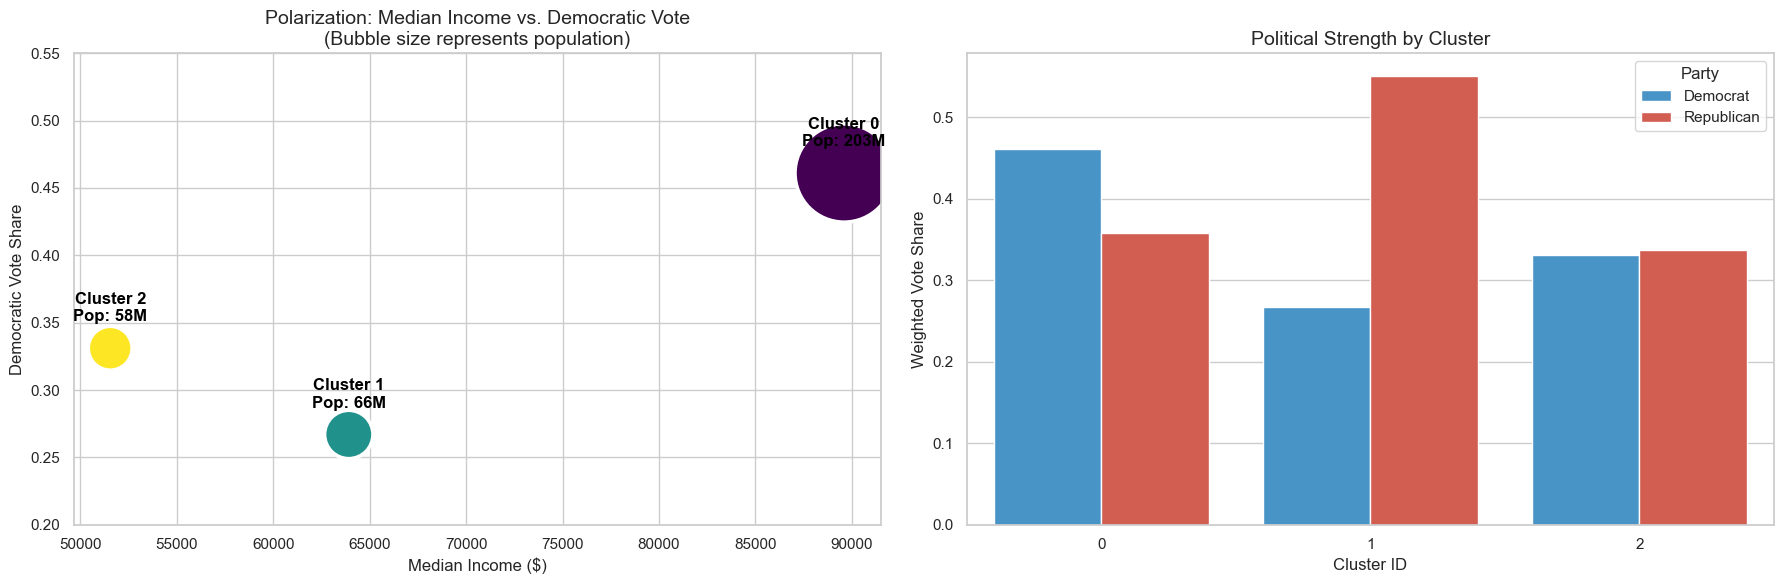

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# ==========================================
# STEP 7: CLUSTER VISUALIZATION (BUBBLE & BAR CHARTS)
# ==========================================

# 1. Data Aggregation
# Constructing a summary dataframe based on the weighted results obtained in Step 6.
# These values represent the centroids and weighted vote shares for each identified cluster.
data = {
    'Cluster': [0, 1, 2],
    'Population': [203392119, 66620711, 58924129],  # Total population per cluster
    'Median_Income': [89597.87, 63917.15, 51547.26],
    'Education_Bach': [38.62, 21.66, 17.84],
    'Vote_Dem': [0.461, 0.267, 0.331],  # Population-weighted Democratic share
    'Vote_Rep': [0.358, 0.551, 0.337]   # Population-weighted Republican share
}

df = pd.DataFrame(data)

# 2. Visual Configuration
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# --- Chart 1: Bubble Chart (Left) ---
# Visualizes the correlation between Income and Democratic Voting.
# The size of the bubble corresponds to the population, highlighting the demographic weight of each group.
sns.scatterplot(
    data=df, 
    x='Median_Income', 
    y='Vote_Dem', 
    size='Population', 
    sizes=(1000, 5000), # Sets minimum and maximum bubble sizes
    hue='Cluster', 
    palette='viridis', 
    legend=False,
    ax=axes[0]
)

# Annotation: Adding descriptive text to each bubble
for i in range(df.shape[0]):
    axes[0].text(
        df.Median_Income[i], 
        df.Vote_Dem[i] + 0.02, # Vertical offset for readability
        f"Cluster {df.Cluster[i]}\nPop: {int(df.Population[i]/1e6)}M", 
        horizontalalignment='center', 
        size='medium', 
        color='black', 
        weight='bold'
    )

axes[0].set_title('Polarization: Median Income vs. Democratic Vote\n(Bubble size represents population)', fontsize=14)
axes[0].set_xlabel('Median Income ($)', fontsize=12)
axes[0].set_ylabel('Democratic Vote Share', fontsize=12)
axes[0].set_ylim(0.2, 0.55) # Axis adjustment for optimal framing

# --- Chart 2: Comparative Bar Chart (Right) ---
# Reshaping data to 'Long Format' to facilitate side-by-side comparison of party strength.
df_melted = df.melt(id_vars=['Cluster'], value_vars=['Vote_Dem', 'Vote_Rep'], var_name='Party', value_name='Score')
df_melted['Party'] = df_melted['Party'].replace({'Vote_Dem': 'Democrat', 'Vote_Rep': 'Republican'})

sns.barplot(
    data=df_melted,
    x='Cluster',
    y='Score',
    hue='Party',
    palette={'Democrat': '#3498db', 'Republican': '#e74c3c'}, # Standard US political colors (Blue/Red)
    ax=axes[1]
)

axes[1].set_title('Political Strength by Cluster', fontsize=14)
axes[1].set_xlabel('Cluster ID', fontsize=12)
axes[1].set_ylabel('Weighted Vote Share', fontsize=12)
axes[1].legend(title='Party')

# Final Rendering
plt.tight_layout()

# ==========================================
# SAUVEGARDE (Code réaligné ici)
# ==========================================
# Petite sécurité : Créer le dossier figures s'il n'existe pas
FIG_DIR.mkdir(parents=True, exist_ok=True)

save_path = FIG_DIR / 'Political_Strength_bycluster.png'
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Graphique sauvegardé sous : {save_path}")

plt.show()

The large purple bubble (Cluster 0) represents the wealthy, highly educated metropolitan areas where the majority of Americans live. This group leans clearly Democratic, showing that the party's strength lies in densely populated economic hubs.

In contrast, the teal bubble (Cluster 1) represents the Republican stronghold. These are middle-income areas with a smaller total population (66 million), but they vote overwhelmingly Republican, providing the party with its most solid and unified base.

Finally, the yellow bubble (Cluster 2) represents the poorest and most struggling counties. Surprisingly, this group is a political deadlock—split almost exactly 50/50 between the two parties. This indicates that the poorest Americans are currently the true "swing" voters, rather than a reliable base for either side.

Context: This "Bonus" section in 03_descriptive.ipynb extends the cluster analysis by deriving secondary political metrics. It moves beyond raw vote shares to measure intensity and competitiveness.

Enriched Cluster Analysis:
   Cluster  Engagement_Politique  Marge_Victoire
0        0                 0.819           0.103
1        1                 0.818          -0.284
2        2                 0.668          -0.006


/var/folders/q7/2bt1kt6d0xzb95k0cn4jftsr0000gn/T/ipykernel_35045/2160808878.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='Marge_Victoire', data=df, palette='coolwarm')


Graphique sauvegardé sous : /Users/jessicabourdouxhe/Desktop/Master 1/Data/Projet /elections-nlp-project/figures/Net_victory_margin_cluster.png


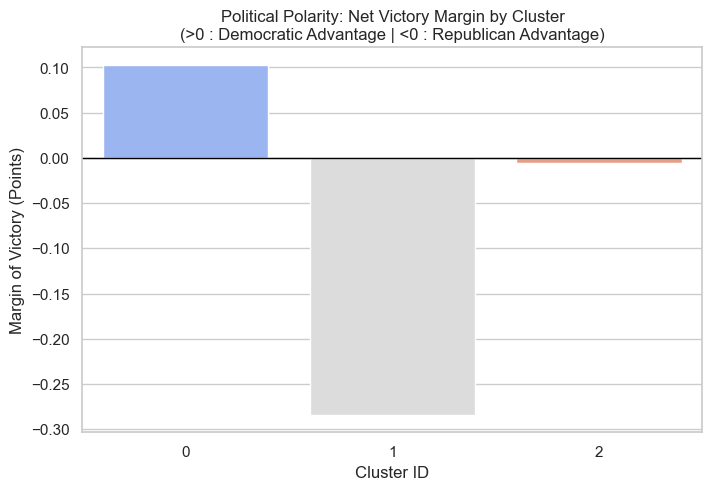

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================================
# STEP 8: BONUS ANALYSIS - POLITICAL METRICS
# ==========================================
# Utilizing the 'df' summary dataframe created in the previous step.

# 1. Compute Political Engagement
# This metric represents the combined vote share of the two major parties, serving as a proxy 
# for the "Two-Party Vote Share" or general political mobilization within the cluster.
df['Engagement_Politique'] = df['Vote_Dem'] + df['Vote_Rep']

# 2. Compute Net Victory Margin
# This metric quantifies the partisan lean. 
# A positive value indicates a Democratic advantage (Blue), while a negative value indicates a Republican advantage (Red).
df['Marge_Victoire'] = df['Vote_Dem'] - df['Vote_Rep']

# 3. Display Enriched Metrics
# Print these calculated indicators for inclusion in the final report.
print("Enriched Cluster Analysis:")
print(df[['Cluster', 'Engagement_Politique', 'Marge_Victoire']])

# ==========================================
# VISUALIZATION: NET VICTORY MARGIN
# ==========================================
# Generate a diverging bar chart to visualize the intensity of political alignment.

plt.figure(figsize=(8, 5))

# Use the 'coolwarm' palette: Blue for high positive values, Red for low negative values.
sns.barplot(x='Cluster', y='Marge_Victoire', data=df, palette='coolwarm')

# Add a horizontal reference line at y=0 to denote political parity (Toss-up).
plt.axhline(0, color='black', linewidth=1) 

plt.title("Political Polarity: Net Victory Margin by Cluster\n(>0 : Democratic Advantage | <0 : Republican Advantage)")
plt.ylabel("Margin of Victory (Points)")
plt.xlabel("Cluster ID")

# ==========================================
# SAUVEGARDE (Code réaligné ici)
# ==========================================
# Petite sécurité : Créer le dossier figures s'il n'existe pas
FIG_DIR.mkdir(parents=True, exist_ok=True)

save_path = FIG_DIR / 'Net_victory_margin_cluster.png'
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Graphique sauvegardé sous : {save_path}")

plt.show()

This chart simplifies the complex vote data into a single "victory score" for each group.

Cluster 0 (The Blue Bar) shows a solid 10-point Democratic advantage. This confirms that the most populous and wealthy counties are the primary engine of Democratic power, delivering reliable wins.

Cluster 1 (The Large Grey/Red Bar) shows a massive 28-point Republican landslide. While Democrats win by a decent margin in their areas, Republicans completely dominate this group (middle-income, white-majority counties), crushing the opposition here.

Cluster 2 (The Tiny Bar) is barely visible because the race is statistically tied (a difference of less than 1 point). This confirms that the poorest, most diverse counties are not a stronghold for anyone—they are the most fiercely contested battleground in the nation.